
● Create the Decision Tree classifier and visualize it graphically. 

● The purpose is if we feed any new data to this classifier, it would be able to 
predict the right class accordingly. 

● Dataset : https://bit.ly/3kXTdox


## Importing Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [65]:
df = pd.read_csv("Iris.csv")

In [66]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [68]:
df.shape

(150, 6)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [70]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [71]:
#dropping the ID column as it is unique
df.drop("Id", axis=1 , inplace=True)

In [72]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualizing Data

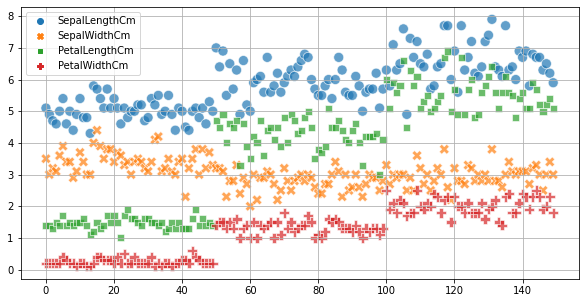

In [73]:

#Plotting distribution of data
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, s=100, alpha=0.7)
plt.grid()
plt.show()

In [74]:
#Extracting independent & dependent variables from dataset
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [75]:
#train test splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0) 

## Decision Tree Algorithm

In [76]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier( criterion="entropy" , max_depth = 4 )
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [77]:
y_pred = classifier.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [78]:
from sklearn import metrics
metrics.accuracy_score(y_test , y_pred)

0.9777777777777777

## Label Encoding

In [79]:
newdf = df

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yhat = le.fit_transform(y_pred)
y_test1 = le.fit_transform(y_test)
yhat

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [81]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test1, yhat, labels=[1,0,2])) ## labels are number of categories

[[17  0  1]
 [ 0 16  0]
 [ 0  0 11]]


Confusion matrix, without normalization
[[17  0  1]
 [ 0 16  0]
 [ 0  0 11]]


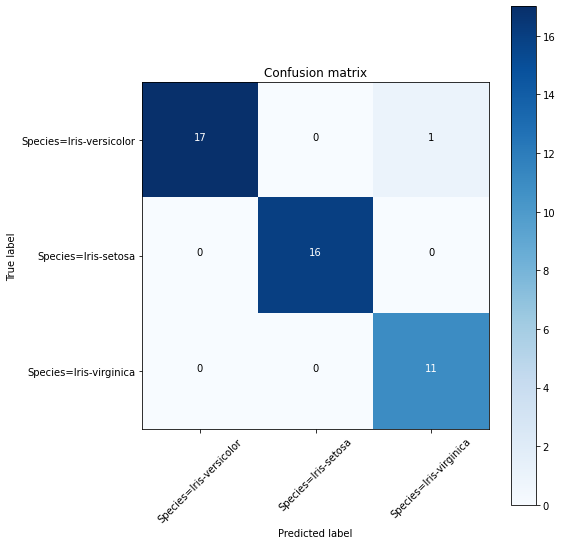

In [83]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test1, yhat, labels=[1,0,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=['Species=Iris-versicolor','Species=Iris-setosa'
                                           ,'Species=Iris-virginica'] ,normalize= False,  
                                            title='Confusion matrix')

## Text representation of the Decision Tree

In [84]:
# !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y

In [85]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz


In [86]:
text_rep = tree.export_text(classifier)
print(text_rep)

|--- feature_2 <= 2.35
|   |--- class: Iris-setosa
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: Iris-virginica



In [87]:
# export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.
dot_data =StringIO()
filename = "iris_classification.png"
features=df.columns.tolist()[:-1] #column names
target=df['Species'].unique() #target column
fig = plt.figure(figsize=(15,15))
dt = tree.export_graphviz(classifier, feature_names=features, out_file=dot_data, 
                          class_names=target, filled=True,rotate=False,rounded = True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200),dpi=100)
plt.imshow(img,interpolation='nearest')


<Figure size 1080x1080 with 0 Axes>